# Example 2

Created using python virtualenv.

In [1]:
# install some dependencies
!pip install pandas numpy matplotlib sklearn

  Using cached pandas-1.0.3-cp37-cp37m-macosx_10_9_x86_64.whl (10.0 MB)
  Using cached numpy-1.18.2-cp37-cp37m-macosx_10_9_x86_64.whl (15.1 MB)
  Using cached matplotlib-3.2.1-cp37-cp37m-macosx_10_9_x86_64.whl (12.4 MB)
Processing /Users/alexremedios/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e/sklearn-0.0-py2.py3-none-any.whl
  Using cached pytz-2019.3-py2.py3-none-any.whl (509 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (113 kB)
     |████████████████████████████████| 7.1 MB 6.9 MB/s eta 0:00:01
  Using cached scipy-1.4.1-cp37-cp37m-macosx_10_6_intel.whl (28.4 MB)
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)


## Take an example from the internet:
**Spectral clustering for image segmentation**  
https://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html

Automatically created module for IPython interactive environment


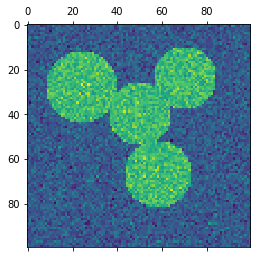

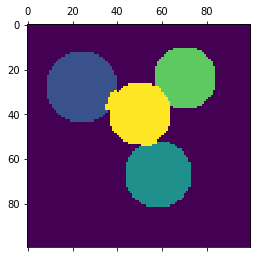

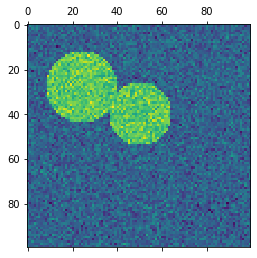

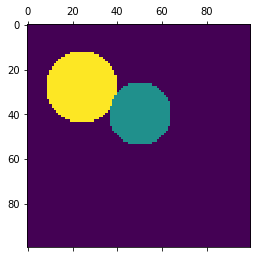

In [2]:
print(__doc__)

# Authors:  Emmanuelle Gouillart <emmanuelle.gouillart@normalesup.org>
#           Gael Varoquaux <gael.varoquaux@normalesup.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

import treebeard

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# #############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

# #############################################################################
# 2 circles
img = circle1 + circle2
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

graph = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=2, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.savefig('output/graph.png')
plt.show()

# Save dependencies

In [3]:
!pip freeze > requirements.txt